# Customer Service Discord Bot Using Cohere model with Agentic RAG

In this cookbook, we are going to be implementing a Discord bot that provides customer service assistance for the Cohere AI platform via its comprehensive
documentation sources and listings.

<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>

## Installation and Setup  
Setting up environment, by installing the CAMEL package with all its dependencies

In [ ]:
!pip install "camel-ai[all]==0.2.16"
!pip install starlette
!pip install nest_asyncio

Next, proceed with setting up API keys for Firecrawl and the model (Cohere)

If you don't have a FireCrawl API key, you can obtain one by following these steps:

1. Visit the FireCrawl API Key page https://www.firecrawl.dev/app/api-keys

2. Log in or sign up for a FireCrawl account.

3. Navigate to the 'API Keys' section.

4. Click on 'Create API Key' button to generate a new API key.

For more details, you can also check the Firecrawl documentation: https://docs.firecrawl.dev/api-reference/introduction

In [ ]:
import os
from getpass import getpass

firecrawl_api_key = getpass("Enter your API key: ")
os.environ["FIRECRAWL_API_KEY"] = firecrawl_api_key

If you don't have a Cohere API key, you can obtain one by following these steps:

1. Visit the Cohere dashboard (https://dashboard.cohere.com/api-keys) and follow the on-screen instructions related to account signup/login.

2. In the left pane dashboard, search for the term "API Keys".

3. On the API Key management page, click on the "Create Trial Key" button under the Trial keys section to generate a new trial key without any subscription.

For more details, you can also check Cohere's documentation: https://docs.cohere.com/cohere-documentation

In [ ]:
import os
from getpass import getpass

cohere_api_key = getpass("Enter your API key: ")
os.environ["COHERE_API_KEY"] = cohere_api_key

## Knowledge Crawling and Storage

Use Firecrawl to crawl a website and store the content in a markdown file:

In [ ]:
import os
from camel.loaders import Firecrawl

os.makedirs('local_data', exist_ok=True)

firecrawl = Firecrawl()

knowledge = firecrawl.crawl(
    url="https://docs.cohere.com/docs/the-cohere-platform"
)["data"][0]["markdown"]

with open('local_data/cohere_platform.md', 'w') as file:
     file.write(knowledge)

## Basic Agent Setup

Command R is a large language model optimized for conversational interaction and long context tasks. It targets the “scalable” category of models that balance high performance with strong accuracy, enabling companies to move beyond proof of concept and into production.

Use Command R  model:

In [ ]:
from camel.configs import CohereConfig
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType

cohere_model = ModelFactory.create(
    model_platform=ModelPlatformType.COHERE,
    model_type=ModelType.COHERE_COMMAND_R,
    model_config_dict=CohereConfig(temperature=0.0).as_dict(),
)


# Use Cohere model
model = cohere_model

# Setting up a ChatAgent with a system prompt
from camel.agents import ChatAgent
from camel.messages import BaseMessage

agent = ChatAgent(
    system_message="You're a helpful assistant",
    message_window_size=10,
    model=model
)

knowledge_message = BaseMessage.make_user_message(
    role_name="User", content=f"Based on the following knowledge: {knowledge}"
)
agent.update_memory(knowledge_message, "user")

## Basic Chatbot Setup

In [ ]:
print("Start chatting! Type 'exit' to end the conversation.")
while True:
    user_input = input("User: ")

    if user_input.lower() == "exit":
        print("Ending conversation.")
        break

    assistant_response = agent.step(user_input)
    print(f"Assistant: {assistant_response.msgs[0].content}")

Start chatting! Type 'exit' to end the conversation.
Assistant: Here are some of Cohere's latest models:

 - Command A
 - Command R7B
 - Command R+
 - Command R
 - Rerank
 - Embed

You can find a full list of Cohere's models and more detailed information about them on the official Cohere website and documentation. The models I mentioned above are from the Command family of models and are primarily focused on text generation for applications like conversational agents, summarization, and copywriting.

Additionally, Cohere also offers models for specific use cases, such as:

 - Retrieval Augmented Generation (RAG): Enables the model to access external data sources, improving the accuracy and factuality of its responses.
 - Fine-Tuning: Custom models can be created by uploading a dataset, and Cohere trains and deploys the model for the user. This can be done with generative models, multi-label classification models, rerank models, and chat models.
 - Semantic Search: Embeddings-based sear

## Basic Discord Bot Integration

To build a discord bot, a discord bot token is necessary.

If you don't have a bot token, you can obtain one by following these steps:

1. Go to the Discord Developer Portal:https://discord.com/developers/applications

2. Log in with your Discord account, or create an account if you don't have one

3. Click on 'New Application' to create a new bot.

4. Give your application a name and click 'Create'.

5. Navigate to the 'Bot' tab on the left sidebar and click 'Add Bot'.

6. Once the bot is created, you will find a 'Token' section. Click 'Reset Token' to generate a new token.

7. Copy the generated token securely.

To invite the bot:

1. Navigate to the 'OAuth2' tab, then to 'URL Generator'.

2. Under 'Scopes', select 'bot'.

3. Under 'Bot Permissions', select the permissions your bot will need (e.g., 'Send Messages', 'Read Messages' for our bot use)

4. Copy the generated URL and paste it into your browser to invite the bot to your server.

To grant the bot permissions:

1. Navigate to the 'Bot' tab

2. Under 'Privileged Gateway Intents', check 'Server Members Intent' and 'Message Content Intent'.

For more details, you can also check the official Discord bot documentation: https://discord.com/developers/docs/intro


In [ ]:
import os
from getpass import getpass

discord_bot_token = getpass('Enter your Discord bot token: ')
os.environ["DISCORD_BOT_TOKEN"] = discord_bot_token

This code cell sets up a simple Discord bot using the DiscordApp class from the camel.bots library. The bot listens for messages in any channel it has access to and provides a response based on the input message.

In [ ]:
from camel.bots import DiscordApp
import nest_asyncio
import discord

nest_asyncio.apply()
discord_bot = DiscordApp(token=discord_bot_token)

@discord_bot.client.event
async def on_message(message: discord.Message):
    if message.author == discord_bot.client.user:
        return

    if message.type != discord.MessageType.default:
        return

    if message.author.bot:
        return
    user_input = message.content

    agent.reset()
    agent.update_memory(knowledge_message, "user")
    assistant_response = agent.step(user_input)

    response_content = assistant_response.msgs[0].content

    if len(response_content) > 2000: # discord message length limit
        for chunk in [response_content[i:i+2000] for i in range(0, len(response_content), 2000)]:
            await message.channel.send(chunk)
    else:
        await message.channel.send(response_content)

discord_bot.run()

[2025-04-15 02:51:34] [INFO    ] discord.client: logging in using static token
[2025-04-15 02:51:34] [INFO    ] discord.client: logging in using static token


2025-04-15 02:51:34,062 - discord.client - INFO - logging in using static token


[2025-04-15 02:51:36] [INFO    ] discord.gateway: Shard ID None has connected to Gateway (Session ID: 24062ffe37fc004bc4cdf22b7191e936).
[2025-04-15 02:51:36] [INFO    ] discord.gateway: Shard ID None has connected to Gateway (Session ID: 24062ffe37fc004bc4cdf22b7191e936).


2025-04-15 02:51:36,780 - discord.gateway - INFO - Shard ID None has connected to Gateway (Session ID: 24062ffe37fc004bc4cdf22b7191e936).


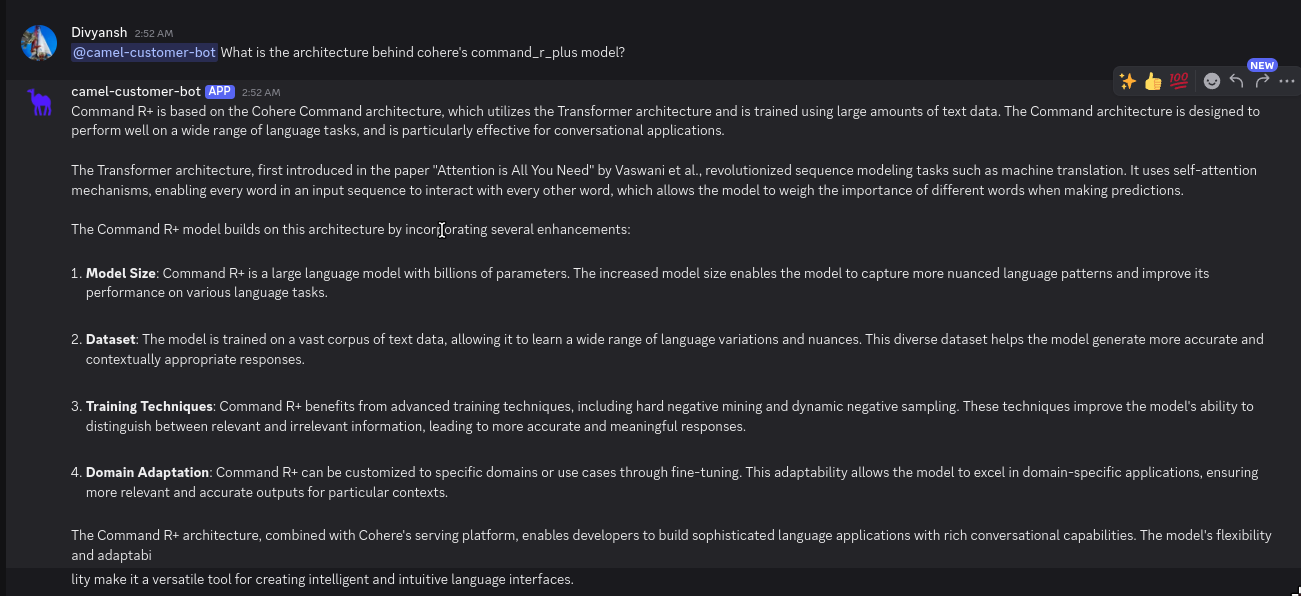

## Integrating Qdrant for Large Files to build a more powerful Discord bot

Qdrant is a vector similarity search engine and vector database. It is designed to perform fast and efficient similarity searches on large datasets of vectors. This enables the chatbot to access and utilize external information to provide more comprehensive and accurate responses. By storing knowledge as vectors, Qdrant enables efficient semantic search, allowing the chatbot to find relevant information based on the meaning of the user's query.

Set up an embedding model and retriever for Qdrant:

In [ ]:
from camel.embeddings import SentenceTransformerEncoder

sentence_encoder = SentenceTransformerEncoder(model_name='intfloat/e5-large-v2')

/home/hurtbadly/miniforge3/envs/camel/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set up the AutoRetriever for automatically retrieving relevant information from a storage system.

In [ ]:
from camel.retrievers import AutoRetriever
from camel.types import StorageType

assistant_sys_msg = """You are a helpful assistant to answer question,
         I will give you the Original Query and Retrieved Context,
        answer the Original Query based on the Retrieved Context,
        if you can't answer the question just say I don't know."""
auto_retriever = AutoRetriever(
              vector_storage_local_path="local_data2/",
              storage_type=StorageType.QDRANT,
              embedding_model=sentence_encoder
            )
qdrant_agent = ChatAgent(system_message=assistant_sys_msg, model=model)

Use Auto RAG to retrieve first and then answer the user's query using CAMEL `ChatAgent` based on the retrieved info:

In [ ]:
from camel.bots import DiscordApp
import nest_asyncio
import discord

nest_asyncio.apply()
discord_q_bot = DiscordApp(token=discord_bot_token)

@discord_q_bot.client.event # triggers when a message is sent in the channel
async def on_message(message: discord.Message):
    if message.author == discord_q_bot.client.user:
        return

    if message.type != discord.MessageType.default:
        return

    if message.author.bot:
        return
    user_input = message.content

    retrieved_info = auto_retriever.run_vector_retriever(
        query=user_input,
        contents=[
            "local_data/cohere_platform.md",
        ],
        top_k=3,
        return_detailed_info=False,
        similarity_threshold=0.5
    )

    user_msg = str(retrieved_info)
    assistant_response = qdrant_agent.step(user_msg)
    response_content = assistant_response.msgs[0].content

    if len(response_content) > 2000: # discord message length limit
        for chunk in [response_content[i:i+2000] for i in range(0, len(response_content), 2000)]:
            await message.channel.send(chunk)
    else:
        await message.channel.send(response_content)

discord_q_bot.run()

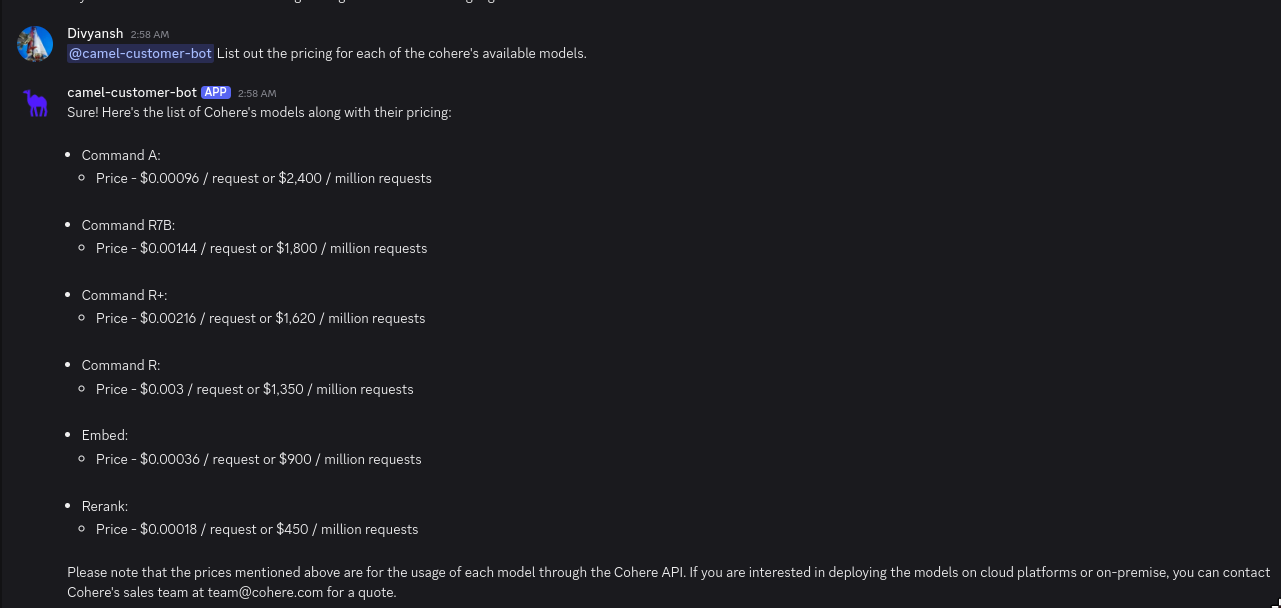

That's everything: Got questions about 🐫 CAMEL-AI? Join us on [Discord](https://discord.camel-ai.org)! Whether you want to share feedback, explore the latest in multi-agent systems, get support, or connect with others on exciting projects, we’d love to have you in the community! 🤝

Check out some of our other work:

1. 🐫 Creating Your First CAMEL Agent [free Colab](https://docs.camel-ai.org/cookbooks/create_your_first_agent.html)

2.  Graph RAG Cookbook [free Colab](https://colab.research.google.com/drive/1uZKQSuu0qW6ukkuSv9TukLB9bVaS1H0U?usp=sharing)

3. 🧑‍⚖️ Create A Hackathon Judge Committee with Workforce [free Colab](https://colab.research.google.com/drive/18ajYUMfwDx3WyrjHow3EvUMpKQDcrLtr?usp=sharing)

4. 🔥 3 ways to ingest data from websites with Firecrawl & CAMEL [free Colab](https://colab.research.google.com/drive/1lOmM3VmgR1hLwDKdeLGFve_75RFW0R9I?usp=sharing)

5. 🦥 Agentic SFT Data Generation with CAMEL and Mistral Models, Fine-Tuned with Unsloth [free Colab](https://colab.research.google.com/drive/1lYgArBw7ARVPSpdwgKLYnp_NEXiNDOd-?usp=sharingg)

Thanks from everyone at 🐫 CAMEL-AI

⭐ **Star the Repo**

If you find CAMEL useful or interesting, please consider giving it a star on our [CAMEL GitHub Repo](https://github.com/camel-ai/camel)! Your stars help others find this project and motivate us to continue improving it.